In [1]:
# Load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('sample_data/wfp_food_prices_eth.csv')
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,9.024325,38.749226,cereals and tubers,Maize (white),100 KG,actual,Wholesale,ETB,120.75,14.8372
2,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,9.024325,38.749226,cereals and tubers,Sorghum (white),100 KG,actual,Wholesale,ETB,187.25,23.0083
3,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,9.024325,38.749226,cereals and tubers,Teff,100 KG,actual,Wholesale,ETB,222.0,27.2782
4,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,9.024325,38.749226,cereals and tubers,Wheat,100 KG,actual,Wholesale,ETB,168.75,20.7351


In [3]:
# Clean data
df = df.drop(['longitude', 'latitude'], axis=1)
df = df.iloc[1:]
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df.head()

,date,admin1,admin2,market,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,cereals and tubers,Maize (white),100 KG,actual,Wholesale,ETB,120.75,14.8372
2,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,cereals and tubers,Sorghum (white),100 KG,actual,Wholesale,ETB,187.25,23.0083
3,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,cereals and tubers,Teff,100 KG,actual,Wholesale,ETB,222.0,27.2782
4,2000-01-15,Addis Ababa,AA ZONE1,Addis Ababa,cereals and tubers,Wheat,100 KG,actual,Wholesale,ETB,168.75,20.7351
5,2000-01-15,Amhara,Administrative unit not available,Baher Dar,cereals and tubers,Maize (white),100 KG,actual,Wholesale,ETB,115.5,14.1921


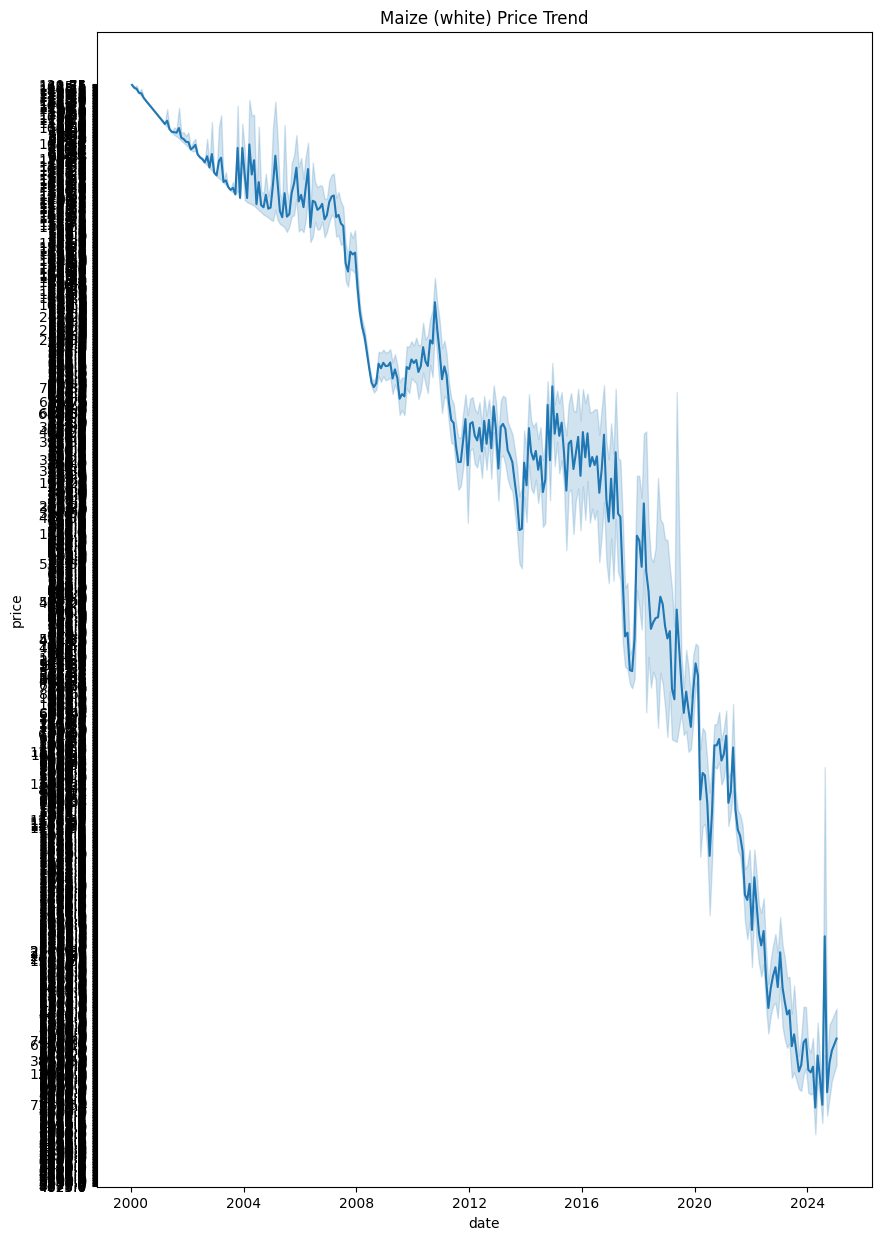

In [4]:
# Example: Plotting Maize prices over time
maize_df = df[df['commodity'] == 'Maize (white)']
plt.figure(figsize=(10, 15))
sns.lineplot(x='date', y='price', data=maize_df)
plt.title('Maize (white) Price Trend')
plt.show()

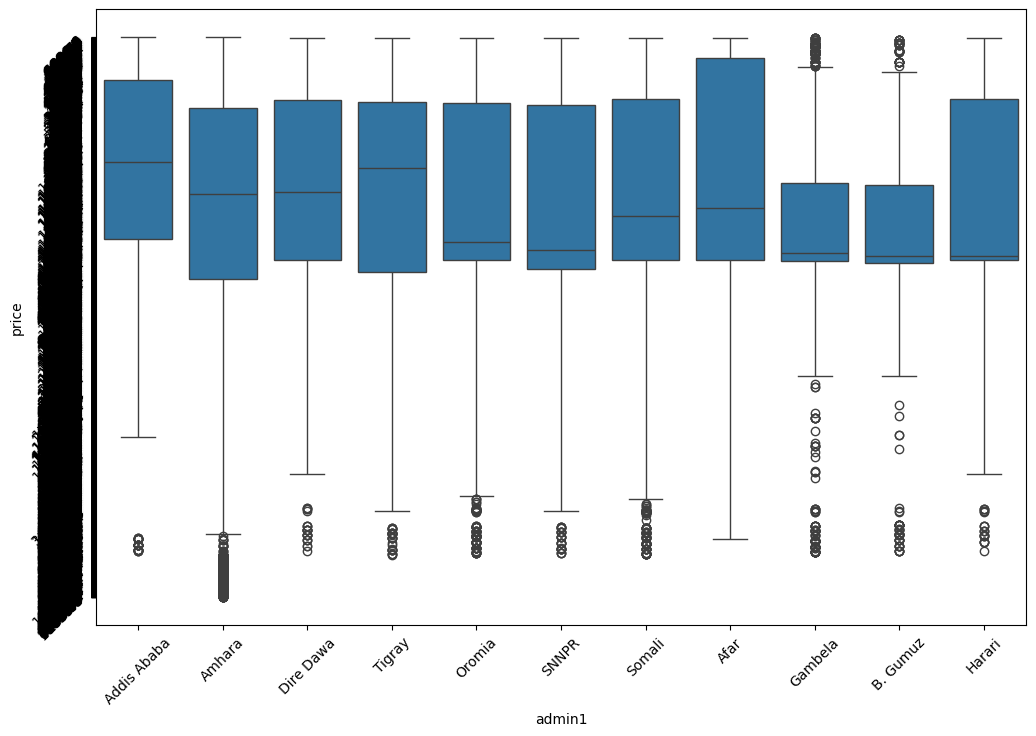

In [ ]:
#Example: plotting box plots of price per admin1
plt.figure(figsize=(12, 8))  # Increase the height (8)
sns.boxplot(data=df, x='admin1', y='price')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [5]:
category_counts = df['category'].value_counts()
commodity_counts = df.groupby('category')['commodity'].value_counts()
print("Category Counts:")
print(category_counts)
print("\nCommodity Counts Within Each Category:")
print(commodity_counts)

Category Counts:
category
cereals and tubers       26498
meat, fish and eggs       6322
pulses and nuts           5441
vegetables and fruits     3103
non-food                  1878
oil and fats              1542
miscellaneous food        1467
milk and dairy             969
Name: count, dtype: int64

Commodity Counts Within Each Category:
category               commodity             
cereals and tubers     Maize (white)             7613
                       Wheat                     4042
                       Sorghum                   2274
                       Wheat (white)             1964
                       Sorghum (white)           1610
                                                 ... 
vegetables and fruits  Avocados                    71
                       Garlic                      45
                       Guava                       14
                       Beans (haricot, white)       2
                       Beans (haricot, red)         1
Name: count, Length:

In [6]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
print(df['price'].dtype)

float64


In [7]:
# 2. Statistical Analysis (ANOVA)
model = ols('price ~ admin1', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Post-hoc test (Tukey's HSD) if ANOVA is significant
if anova_table['PR(>F)']['admin1'] < 0.05:  # Check if p-value is significant
    tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['admin1'], alpha=0.05)
    print("\nTukey's HSD:")
    print(tukey)

ANOVA Table:
                sum_sq       df           F         PR(>F)
admin1    4.173750e+10     10.0  133.784478  2.549259e-277
Residual  1.472806e+12  47209.0         NaN            NaN

Tukey's HSD:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1     group2   meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
Addis Ababa      Afar  4444.0643    0.0  3863.5422  5024.5864   True
Addis Ababa    Amhara  1168.2035    0.0   724.8216  1611.5854   True
Addis Ababa  B. Gumuz  2037.4861    0.0   1188.637  2886.3352   True
Addis Ababa Dire Dawa  1975.7332    0.0   1403.589  2547.8775   True
Addis Ababa   Gambela  3169.3948    0.0  2506.0533  3832.7363   True
Addis Ababa    Harari  3748.3309    0.0  3035.6357   4461.026   True
Addis Ababa    Oromia  2379.0073    0.0  1945.7487  2812.2659   True
Addis Ababa     SNNPR  1244.7795    0.0   734.8123  1754.7467   True
Addis Ababa    Somali  3023.0758    0

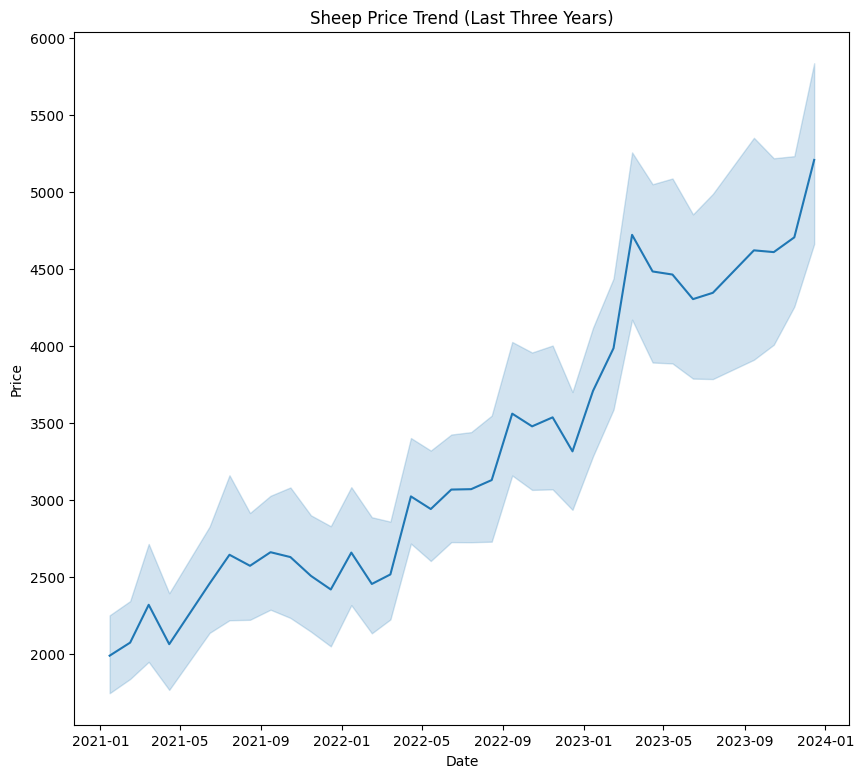


Descriptive Statistics for Sheep Prices:
count     1267.000000
mean      3308.741105
std       1649.432046
min        130.000000
25%       2100.000000
50%       2900.000000
75%       4002.500000
max      10500.000000
Name: price, dtype: float64


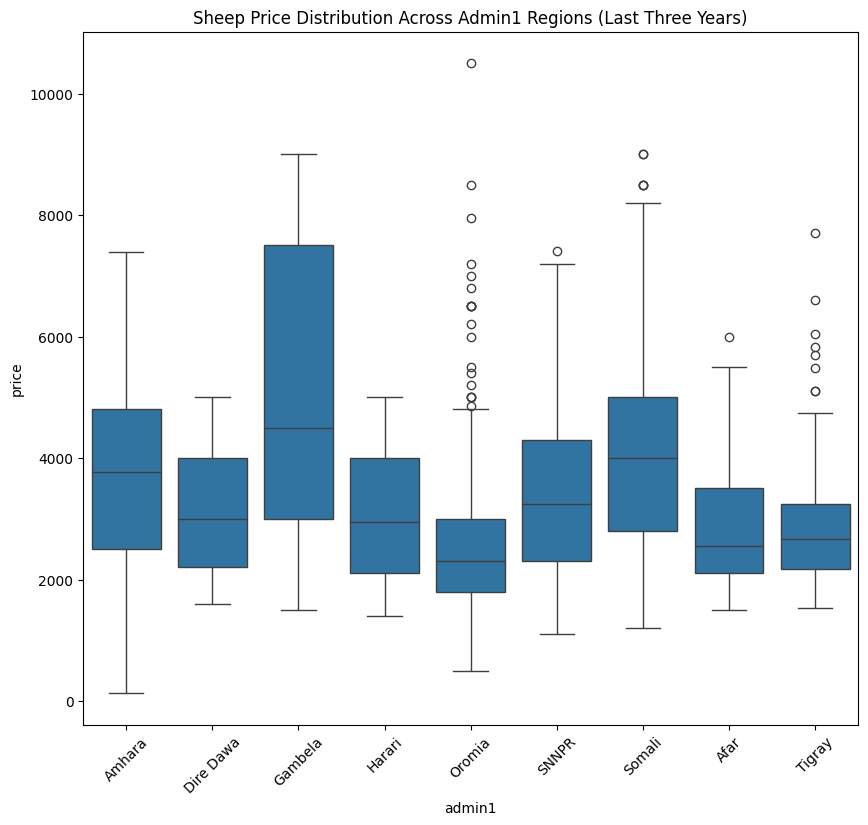


ANOVA Table for Sheep Prices:
                sum_sq      df         F        PR(>F)
admin1    8.285332e+08     8.0  49.80804  4.033620e-70
Residual  2.615779e+09  1258.0       NaN           NaN

Tukey's HSD for Sheep Prices:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2   meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------
     Afar    Amhara   938.5509 0.0007   256.8361  1620.2656   True
     Afar Dire Dawa   176.5325 0.9997  -791.6725  1144.7376  False
     Afar   Gambela  2407.1206    0.0  1680.5845  3133.6567   True
     Afar    Harari   105.3204    1.0  -862.8846  1073.5255  False
     Afar    Oromia  -288.1181 0.8705  -898.1784   321.9421  False
     Afar     SNNPR   585.7944  0.154   -92.0332  1263.6221  False
     Afar    Somali   1282.633    0.0   614.4332  1950.8328   True
     Afar    Tigray    98.4237    1.0   -629.479   826.3264  False
   Amhara Dire Dawa  -762.0183 0.133

In [ ]:
# 1. Filter the Data (as before, but important to have)
# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
# Filter for 'Sheep' and the last three years
current_year = 2024
last_three_years = [current_year - 1, current_year - 2, current_year - 3]
sheep_df = df[(df['commodity'] == 'Livestock (Sheep)') & (df['year'].isin(last_three_years))]
if (len(sheep_df) == 0):
  print("There is no data for sheep in the last three years")
else:
  # 2. Analyze the Filtered Data
  # Visualize the price trend
  plt.figure(figsize=(10, 9))
  sns.lineplot(x='date', y='price', data=sheep_df)
  plt.title('Sheep Price Trend (Last Three Years)')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()

print("\nDescriptive Statistics for Sheep Prices:")
print(sheep_df['price'].describe())

# Analyze price differences across regions
plt.figure(figsize=(10, 9))
sns.boxplot(x='admin1', y='price', data=sheep_df)
plt.title('Sheep Price Distribution Across Admin1 Regions (Last Three Years)')
plt.xticks(rotation=45)
plt.show()

# 3. Statistical Analysis (ANOVA) for Sheep Prices
model = ols('price ~ admin1', data=sheep_df).fit()  # Use sheep_df here
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table for Sheep Prices:")
print(anova_table)

# Post-hoc test (Tukey's HSD) if ANOVA is significant
if anova_table['PR(>F)']['admin1'] < 0.05:
  tukey = pairwise_tukeyhsd(endog=sheep_df['price'], groups=sheep_df['admin1'], alpha=0.05) # Use sheep_df here
  print("\nTukey's HSD for Sheep Prices:")
  print(tukey)
else:
  print("\nANOVA for Sheep Prices is not significant, no need for Tukey's HSD.")

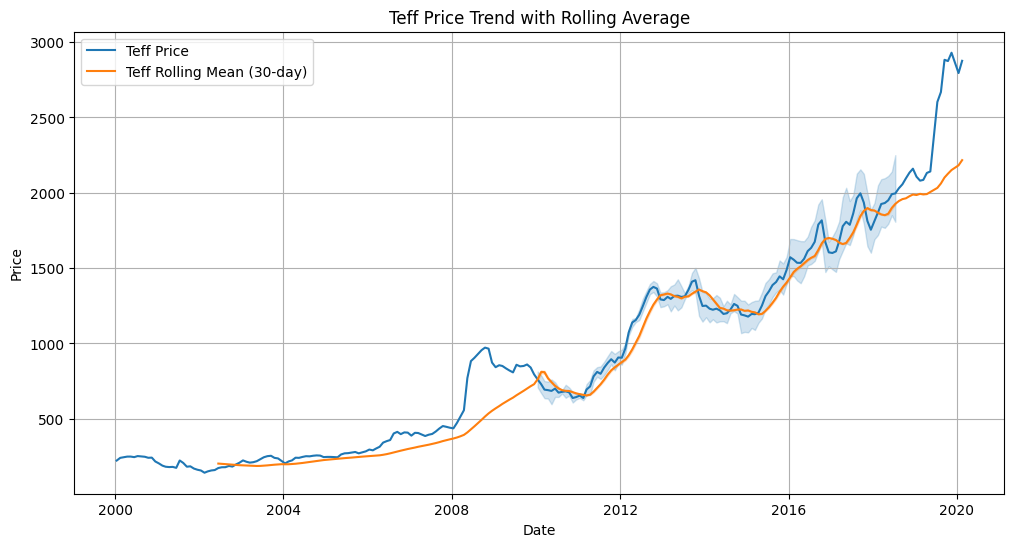


Descriptive Statistics for Teff Price:
count     651.000000
mean     1150.101598
std       558.338974
min       141.250000
25%       744.180000
50%      1226.000000
75%      1487.250000
max      2930.000000
Name: price, dtype: float64

Descriptive Statistics for Teff Rolling Mean Price (30-day):
count     622.000000
mean     1143.112701
std       501.932635
min       186.052667
25%       726.138167
50%      1225.716667
75%      1504.557333
max      2216.698333
Name: price_rolling_mean, dtype: float64


In [14]:
commodity="Teff"
window=30
 # 1. Filter data by commodity
commodity_df = df[df['commodity'] == commodity].copy()  # Create a copy to avoid modifying original DataFrame

# Check if the commodity exists
if commodity_df.empty:
    print(f"No data found for commodity: {commodity}")

# 2. Sort by date (ensure data is in time order)
commodity_df = commodity_df.sort_values('date')


# 3. Calculate rolling average
commodity_df['price_rolling_mean'] = commodity_df['price'].rolling(window=window).mean()

# 4. Visualize the price trend with rolling average
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='price', data=commodity_df, label=f'{commodity} Price')
sns.lineplot(x='date', y='price_rolling_mean', data=commodity_df,label=f'{commodity} Rolling Mean ({window}-day)')
plt.title(f'{commodity} Price Trend with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 5. Print descriptive statistics of the price and rolling mean
print(f"\nDescriptive Statistics for {commodity} Price:")
print(commodity_df['price'].describe())
print(f"\nDescriptive Statistics for {commodity} Rolling Mean Price ({window}-day):")
print(commodity_df['price_rolling_mean'].describe())